In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [54]:
X = df.loc[:, ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
y = pd.get_dummies(df.loc[:, 'variety']).values     # one hot encoding

X = np.concatenate((np.ones((len(X), 1)), X), axis=1)


# Normalize data
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
n_features = X.shape[1]
n_classes = y.shape[1]

# split train & test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Convert np.array to tensor
x_train = tf.constant(x_train)
x_test = tf.constant(x_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [76]:
class SoftmaxRegression:
    def __init__(self, n_features, n_classes, lr=0.1, epoch_max=1001):
        self.n_features = n_features
        self.n_classes = n_classes
        self.lr = lr
        self.epoch_max = epoch_max
        self.losses = []

    def loss_entropy(self, y_hat, y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))

    def fit(self, X, y):
        self.w = tf.Variable(np.random.randn(X.shape[1], self.n_classes), dtype=tf.float64)
        self.b = tf.Variable(np.zeros(self.n_classes), dtype=tf.float64)
        self.theta = tf.Variable(np.random.randn(X.shape[1], n_classes), dtype=tf.float64)

        optimizer = tf.optimizers.Adam(learning_rate=self.lr)

        for epoch in range(self.epoch_max):
            with tf.GradientTape() as tape:
                # y_hat = tf.math.softmax(X @ self.theta)
                z = tf.matmul(X, self.w) + self.b
                y_hat = tf.nn.softmax(z)
                loss = self.loss_entropy(y_hat, y)
                self.losses.append(loss)
            gradients = tape.gradient(loss, [self.w, self.b])
            optimizer.apply_gradients(zip(gradients, [self.w, self.b]))
            # gradients = tape.gradient(loss, self.theta)
            # optimizer.apply_gradients(zip(gradients, self.theta))

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: loss = {loss:.5f}")

    def predict(self, X):
        z = tf.matmul(X, self.w) + self.b
        y_hat = tf.nn.softmax(z)
        return tf.argmax(y_hat, axis=1)

    def test(self, x_test, y_test):
        y_predict = self.predict(x_test)
        accuracy_score = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_test, axis=1), y_predict), tf.float32))
        return accuracy_score

    def plot_loss(self):
        plt.plot(self.losses)
        plt.ylabel("Losses")
        plt.xlabel("Epoch")
        plt.title("Loss")
        plt.show()

Epoch 0: loss = 0.95618
Epoch 100: loss = 0.58475
Epoch 200: loss = 0.57920
Epoch 300: loss = 0.57713
Epoch 400: loss = 0.57598
Epoch 500: loss = 0.57519
Epoch 600: loss = 0.57460
Epoch 700: loss = 0.57410
Epoch 800: loss = 0.57367
Epoch 900: loss = 0.57326
Epoch 1000: loss = 0.57288
=> Accuracy: 0.9917


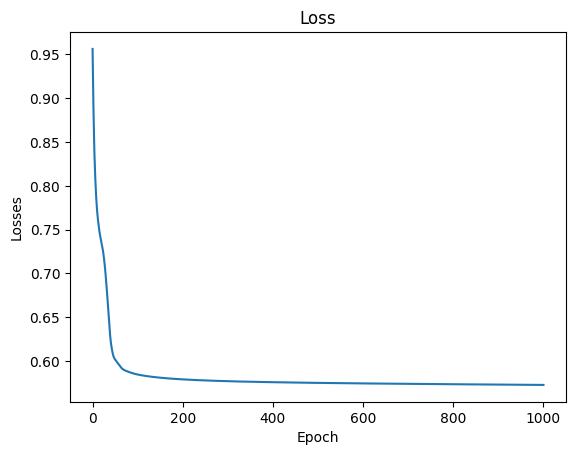

In [79]:
start_train = time.time()
model = SoftmaxRegression(n_features, n_classes, lr=0.1, epoch_max=1001)
model.fit(x_train, y_train)
accuracy = model.test(x_train, y_train)
end_train = time.time()

print(f"=> Accuracy: {accuracy:.4f}")
model.plot_loss()

In [78]:
start_test = time.time()
accuracy = model.test(x_test, y_test)
end_test = time.time()

print(f"=> Accuracy: {accuracy:.4f}")
print(f"- Training time: {end_train - start_train:.3f} (s)")
print(f"- Testing time: {end_test - start_test:.3f} (s)")

=> Accuracy: 1.0000
- Training time: 10.871 (s)
- Testing time: 0.003 (s)
